<a href="https://colab.research.google.com/github/mondtorsha/Computer-Vision/blob/main/Level_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Yoga Pose Classification 

Level 1- Detecting the keypoints on the images by using the PoseNet

In [1]:
!git clone https://github.com/rwightman/posenet-pytorch
%cd posenet-pytorch

Cloning into 'posenet-pytorch'...
remote: Enumerating objects: 115, done.
remote: Total 115 (delta 0), reused 0 (delta 0), pack-reused 115
Receiving objects: 100% (115/115), 34.73 KiB | 5.79 MiB/s, done.
Resolving deltas: 100% (62/62), done.
/content/posenet-pytorch


In [2]:
#importing necessary libraries
import os
import cv2
import torch
import posenet
import tensorflow as tf
import matplotlib.pyplot as plt

In [3]:
!pip install tfjs-graph-converter

     |████████████████████████████████| 64 kB 3.4 MB/s 


In [4]:
#importing pytorch
import torch
from posenet.constants import *
from posenet.decode_multi import decode_multiple_poses
from posenet.models.model_factory import load_model
from posenet.utils import *


net = load_model(101)
net = net.cuda()
output_stride = net.output_stride
scale_factor = 1.0

Cannot find models file ./_models/mobilenet_v1_101.pth, converting from tfjs...
Weights for checkpoint mobilenet_v1_101 are not downloaded. Downloading to /tmp/_posenet_weights ...


In [5]:
#creating posenet_model
def posenet_model(file):
    input_image, draw_image, output_scale = posenet.read_imgfile(file, scale_factor=scale_factor, output_stride=output_stride)
    with torch.no_grad():
        input_image = torch.Tensor(input_image).cuda()

        heatmaps_result, offsets_result, displacement_fwd_result, displacement_bwd_result = net(input_image)

        pose_scores, keypoint_scores, keypoint_coords = posenet.decode_multiple_poses(
            heatmaps_result.squeeze(0),
            offsets_result.squeeze(0),
            displacement_fwd_result.squeeze(0),
            displacement_bwd_result.squeeze(0),
            output_stride=output_stride,
            max_pose_detections=10,
            min_pose_score=0.25)
        
        #Find keypoints on the image
        image = plt.imread(file)
        poses = []
        
        for pi in range(len(pose_scores)):
            if pose_scores[pi] != 0.:
                print('Pose #%d, score = %f' % (pi, pose_scores[pi]))       
                keypoints = keypoint_coords.astype(np.int32) 
                print(keypoints[pi])
                poses.append(keypoints[pi])
        
        #Show keypoints on the image
        img = plt.imread(file)
        i=0
        pose = poses[0]
        plt.imshow(img)    
        for y,x in pose:
            plt.plot(x, y, 'w.') 
            plt.text(x, y, str(i), color='r', fontsize=10)
            i+=1   
        plt.show()

In [6]:
# importing the dataset directly from Kaggle
import os
os.environ['KAGGLE_CONFIG_DIR']  = '/content'

In [7]:
!kaggle datasets download -d niharika41298/yoga-poses-dataset

 99% 285M/288M [00:02<00:00, 115MB/s]
100% 288M/288M [00:02<00:00, 126MB/s]


In [ ]:
!unzip \*yoga-poses-dataset.zip

In [11]:
file = '/content/posenet-pytorch/DATASET/TRAIN/warrior2/00000120.jpg'

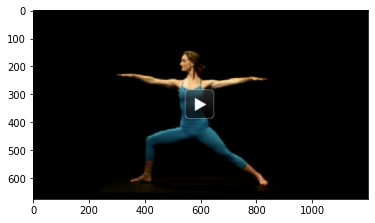

In [12]:
#sample image
import matplotlib.pyplot as plt
img = plt.imread(file)
plt.imshow(img)
plt.show()

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


Pose #0, score = 0.306384
[[189 527]
 [181 541]
 [178 532]
 [190 575]
 [187 533]
 [259 610]
 [247 548]
 [309 668]
 [252 445]
 [290 663]
 [237 357]
 [424 613]
 [426 553]
 [524 691]
 [495 516]
 [626 772]
 [561 544]]


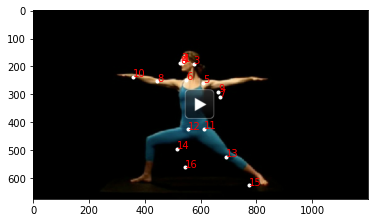

In [13]:
#key points on the image
posenet_model(file)

In [14]:
file2 = '/content/posenet-pytorch/DATASET/TRAIN/goddess/00000096.jpg'

file3 = '/content/posenet-pytorch/DATASET/TRAIN/tree/00000075.jpg'

Pose #0, score = 0.523821
[[ 64 406]
 [ 51 417]
 [ 50 391]
 [ 59 432]
 [ 62 374]
 [146 463]
 [146 353]
 [218 517]
 [221 301]
 [209 437]
 [213 382]
 [305 453]
 [303 370]
 [375 575]
 [373 237]
 [483 554]
 [494 258]]


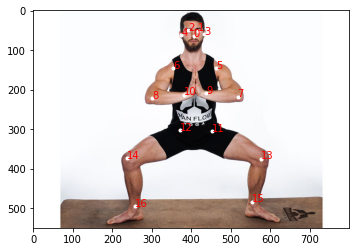

In [15]:
posenet_model(file2)

Pose #0, score = 0.457233
[[145 209]
 [141 214]
 [139 203]
 [149 223]
 [147 196]
 [173 228]
 [173 193]
 [136 231]
 [133 188]
 [106 220]
 [ 99 206]
 [249 220]
 [248 194]
 [294 215]
 [268 166]
 [349 205]
 [277 201]]


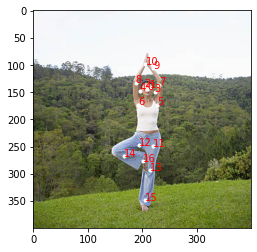

In [16]:
posenet_model(file3)